# 1D Wave Equation

## Staggered grid formulation

The 1D (acoustic) wave equation in velocity-pressure formulation is a coupled system of two first-order partial differential equations

$$
\rho \frac{\partial v}{\partial t} = \frac{\partial  p}{\partial x} , \quad x \in [0,L], \quad t >0,
$$
$$
\frac{\partial p}{\partial t}   = \mu \frac{\partial v}{\partial x}  + f, \quad x \in [0,L], \quad t >0,
$$

where,

- $ p $ is the pressure,
- $ \rho $ is the density,
- $ v $ is the velocity,
- $ \mu = \rho c^2 $ is the shear modulus, and
- $ f $ is the source (in the fluid).

The initial condition is set to zero,

$$ v(x,0) = p(x,0) = 0, $$

since we are using a time-dependent source

$$ f(x,t) = F(t) \delta(x), $$

where 

$$ \delta(x)=\begin{cases}
1, & x=x_{s},\\
0, & \mathrm{elsewhere}.
\end{cases}
$$

and $F(t)$ is either a Gaussian or some type of Ricker wavelet.

For grid staggering, the discrete velocity and pressure are defined on a regularly spaced grid in space and time. Then, partial derivatives are replaced with centered finite-difference approximations of the first derivatives. However, these are not defined at the grid points  but midway between them.
In 2nd-order grid staggering the following computational scheme is used

$$
\frac{v_i^{j+ \tfrac{1}{2}} - v_i^{j- \tfrac{1}{2}} }{\Delta t} \ = \ \frac{1}{\rho_i}\frac{p_{i + \tfrac{1}{2}}^j - p_{i - \tfrac{1}{2}}^j }{h} 
$$

$$
\frac{p_{i+\tfrac{1}{2}}^{j+1} - p_{i+\tfrac{1}{2}}^j }{\Delta t} \ = \ \mu_{i+\tfrac{1}{2}}  \frac{v_{i + 1}^{j +\tfrac{1}{2}} - v_i^{j + \tfrac{1}{2}} }{h} + f_{i+\tfrac{1}{2}}^j
$$

The explicit scheme becomes

$$
v_i^{j+ \tfrac{1}{2}} \ = \ v_i^{j- \tfrac{1}{2}}  + \frac{\Delta t}{h} \frac{1}{\rho_i}  \left(p_{i + \tfrac{1}{2}}^j - p_{i - \tfrac{1}{2}}^j \right) \ 
$$

$$
p_{i+\tfrac{1}{2}}^{j+1} \ = \  p_{i+\tfrac{1}{2}}^j  + \frac{\Delta t}{h} \ \mu_{i+\tfrac{1}{2}} \left( v_{i + 1}^{j +\tfrac{1}{2}} - v_i^{j + \tfrac{1}{2}} \right)  + \Delta t \  f_{i+\tfrac{1}{2}}^j
$$


**Note that in the codes below we do not deal with the index fractions.** We use the convention

$$  v^{j - \tfrac{1}{2}} \rightarrow v [n-1],$$

$$  v^{j+ \tfrac{1}{2}} \rightarrow v [n],$$

and

$$  p_{i - \tfrac{1}{2}} \rightarrow p [i-1],$$

$$  p_{i+ \tfrac{1}{2}} \rightarrow p [i].$$

### General Formulation

We can formulate a more general, 2nd-4th order scheme as follows.

$$
v_i^{j+ \tfrac{1}{2}} \ = \ v_i^{j- \tfrac{1}{2}}  +  \frac{1}{\rho_i} \frac{\Delta t}{h} \left[ a \left( p_{i + \tfrac{3}{2}}^j - p_{i - \tfrac{3}{2}}^j \right) + b \left( p_{i + \tfrac{1}{2}}^j - p_{i - \tfrac{1}{2}}^j \right) \right]
$$

$$
p_{i+\tfrac{1}{2}}^{j+1} \ = \  p_{i+\tfrac{1}{2}}^j  + \mu_{i+\tfrac{1}{2}} \frac{\Delta t}{h} \ \left[ a  \left( v_{i + 2}^{j +\tfrac{1}{2}} - v_{i-1}^{j + \tfrac{1}{2}} \right) 
+ b \left(v_{i + 1}^{j +\tfrac{1}{2}} - v_i^{j + \tfrac{1}{2}} \right) + \Delta t \  f_{i+\tfrac{1}{2}}^j
\right]
$$

where 

- for 4th order in space: $a = -1/24,$ $b = 9/8$
- for 2nd order in space:  $a = 0,$ $b = 1.$

The 4th order scheme is particularly useful/indicated for discontinuous media, where it can provide a less oscillatory solution. (**TBC**)

## Boundary conditions

We will use a CPML absorbing boundary condition at the left-hand extremity, $x=0,$ as formulated below, and a mixed boundary condition at the right-hand extremity, $x=L.$

The mixed condition is written as

$$ \frac{\partial u}{\partial n} + \alpha u = \beta, $$

where $u = v$ or $u=p,$ the normal derivative is just $d/dx$ in 1D and when $\alpha=0$ we obtain a pure Neumann condition.

We will use a second-order accurate approximation of $du/dx$ at $x=x_M=L,$

$$ \frac{du}{dx} \approx \frac{3u_M - 4u_{M-1} + u_{M-2}}{2h} $$

the right-hand extremity.  The approximate mixed condition then gives an equation for the unknown value

$$ u_M = \frac{1}{3+2h\alpha}(2h\beta + 4u_{M-1} - u_{M-2}  ).$$

For the fourth-order scheme, we will use the same scheme, since derivative boundary conditions can become quite "unwieldy" in this case---see Strikwerda, 2005.

An alternative, is to use a centrered difference,

$$ \frac{du}{dx} \approx \frac{u_{M+1} - u_{M-1}}{2h} $$

and the stencil for the wave equation at $x=x_M,$ to eliminate the "ghost" value $u_{M+1} .$


# CPML boundary condition

## Damping function

Set up the 1D damping function, $d_x(x),$ in the PML regions, i.e. at one or both extremities of the 1D interval in this case.

$$ d_x(x) = \begin{cases}
d_0 \left( \dfrac{x}{\ell}  \right)^m, & x \in \Omega_{\mathrm{pml}}\\
0, & x\in \Omega \setminus \Omega_{\mathrm{pml}}
\end{cases}   
$$

where 

$$ d_0 = \frac{(m+1)c_p \log (1/R_c)}{2\ell}$$

and

- $m$ is the polynomial decay order, usually 2, 3 or 4
- $\ell$ is the width of the PML layer
- $c_p$ is the compressional wave speed
- $R_c$ is the desired reflection coefficient at normal incidence, usually $10^{-4}$ to $10^{-6}$

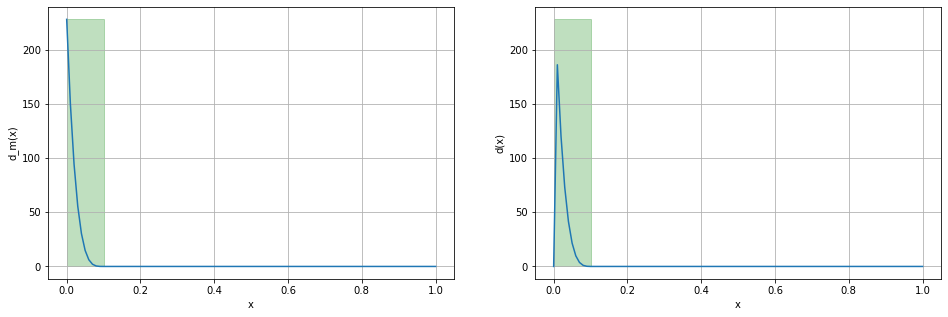

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
#plt.rcParams['text.usetex'] = True
# setup 1D domain, Omega
Nx = 101 #11 #100 # number of points (or dx)
L  = 1  # length
xL = 0  # left bdy
xR = xL + L  # right bdy
# setup PML domain, Omega_pml
pml_width = 0.1*Nx #input variable! maybe % of L
dx = L/(Nx-1) 
l  = pml_width*dx
# other parameters
R_c = 1.e-4
c_p = 1 #3300
m   = 4
dt = dx # for the moment... 
f0 = 1 #1000 # 1kHz source, say
#
d0 = (m+1)*c_p*np.log(1/R_c) / (2*l)
#
d_x  = np.zeros(Nx) #  half grid cells
d_xm = np.zeros(Nx) # grid cells 
Psi_v = np.zeros(Nx) # velocity memory variable
Psi_p = np.zeros(Nx) # pressure memory variable
# setup d(x)
for mm in range(int(pml_width)):
    d_x[mm+1]     = d0*((pml_width-mm-0.5)/pml_width)**m # left - at half grid cell (for p)
    d_xm[mm]      = d0*((pml_width-mm)/pml_width)**m     # left - at grid cell
    #d_x[Nx-mm-1]  = d0*((pml_width-mm-0.5)/pml_width)**m  # right - at half grid cell(for p)
    #d_xm[Nx-mm-1] = d0*((pml_width-mm)/pml_width)**m # right - at grid cell
# plot the damping function
x = dx*np.arange(0,Nx,1)
from matplotlib.patches import Rectangle
fig, ax = plt.subplots(figsize=(16,5))
ax1 = plt.subplot(121)
ax1.plot(x,d_xm)
ax1.add_patch(Rectangle((0,0), l, np.max(d_xm),color='green', alpha=0.25))
#ax1.add_patch(Rectangle((L-l,0),l,np.max(d_xm),color='green', alpha=0.25))
plt.xlabel('x'), plt.ylabel('d_m(x)'), plt.grid()
ax2 = plt.subplot(122)
ax2.plot(x,d_x)
ax2.add_patch(Rectangle((0,0),  l,np.max(d_xm),color='green', alpha=0.25))
#ax2.add_patch(Rectangle((L-l,0),l,np.max(d_xm),color='green', alpha=0.25))
plt.xlabel('x'), plt.ylabel('d(x)'), plt.grid()
plt.show()

## Memory variables

The CPML is based on the stretched coordinate, 

$$ s_c = \kappa_x + \frac{d_x}{\alpha_x + \mathrm{i} \omega}, $$

where $d_x$ is the damping function defined above, $\kappa_x  $ and $\alpha_x $ are positive constants and $\omega$ is the frequency. The classical PML is a special case, obtained for $\kappa_x  = 1$ and $\alpha_x = 0.$ Transforming back to the time domain, we obtain the change of variables for the $x$-derivative,

$$ \partial_{x} \rightarrow \partial_{\tilde{x}} = \frac{1}{\kappa_x} \partial_x + \psi_x,$$

where the *memory variable,* $\psi_x,$ is computed by the time-update

$$
  \psi_x^n = b_x \psi_x^{n-1} + a_x (\partial_x)^{n+1/2} 
$$
with the coefficients
$$
  a_x = \frac{d_x}{\kappa_x(d_x + \kappa_x \alpha_x)} (b_x - 1)
$$
and
$$
  b_x = \mathrm{e}^{-\left({d_x}/{\kappa_x} + \alpha_x \right)\Delta t}.
$$

For the stretched coordinate coefficients, we will fix $\kappa_x = 1$ since it has very little effect on elastic wave propagation (evanescent waves) and  $\alpha_x$ varies linearly in the layer from $\alpha_\mathrm{max}$ at $x=x_L $ and $x=x_R$ to zero at the outer edges of the layers, $x=x_L -l$ and $x=x_R + l,$ respectively. Finally, we set $\alpha_\mathrm{max} = \pi f_0,$  where $f_0$ is the dominant frequency of the source. 

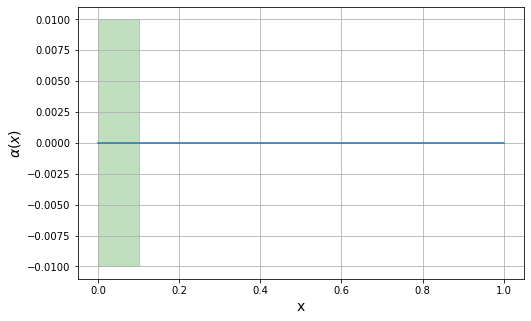

In [30]:
kappa_x = 1
alpha_max = np.pi * f0 *10**(-4) # must be << d_max
alpha_x  = np.zeros(Nx) #+1) #  half grid cells
alpha_xm = np.zeros(Nx) #+1) # grid cells 
for mm in range(int(pml_width)):
    alpha_x[mm+1]     = alpha_max*((pml_width-mm-0.5)/pml_width) # left - at half grid cell (for p)
    alpha_xm[mm]      = alpha_max - alpha_max*((pml_width-mm)/pml_width)  # left - at grid cell
    #alpha_x[Nx-mm-1]  = alpha_max*((pml_width-mm-0.5)/pml_width)  # right - at half grid cell(for p)
    #alpha_xm[Nx-mm-1] = alpha_max - alpha_max*((pml_width-mm)/pml_width) # right - at grid cell
# in 1D, with normal incidence only, alpha is not necessary at all...
alpha_x  = np.zeros(Nx) #+1) #  half grid cells
alpha_xm = np.zeros(Nx) #+1) # grid cells 
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x,alpha_xm)
ax.add_patch(Rectangle((0,-0.01),l,0.02,color='green', alpha=0.25))
#ax.add_patch(Rectangle((L-l,0),l,np.max([np.max(alpha_xm),0.]),color='green', alpha=0.25))
plt.xlabel('x',fontsize=14), plt.ylabel(r"$\alpha(x)$",fontsize=14), plt.grid()
plt.show()
# a_x, b_x for p
bp_x = np.exp(-(d_x/kappa_x + alpha_x)*dt)
ap_x = np.zeros(Nx)
#Ip  = np.arange(1, int(pml_width))
Ip  = np.arange(0, int(pml_width))
#Ipm = np.arange(Nx-int(pml_width), Nx)
ap_x[Ip+1]  = d_x[Ip+1]/ (kappa_x*(d_x[Ip+1]  + kappa_x*alpha_x[Ip+1]))  * (bp_x[Ip+1] - 1)#ap_x[Ip]  = (bp_x[Ip] - 1) # assumes kappa=1, alpha=0 !!!
#ap_x[Ipm] = d_x[Ipm]/(kappa_x*(d_x[Ipm] + kappa_x*alpha_x[Ipm])) * (bp_x[Ipm] - 1)
# a_x, b_x for v
bv_x = np.exp(-(d_xm/kappa_x + alpha_xm)*dt)
av_x = np.zeros(Nx+1)
av_x[Ip]  = d_xm[Ip] /(kappa_x*(d_xm[Ip]  + kappa_x*alpha_xm[Ip]))  * (bv_x[Ip] - 1)
#av_x[Ipm] = d_xm[Ipm]/(kappa_x*(d_xm[Ipm] + kappa_x*alpha_xm[Ipm])) * (bv_x[Ipm] - 1)

## Time loop

Here we need an extra equation for updating the memory variable $\psi .$

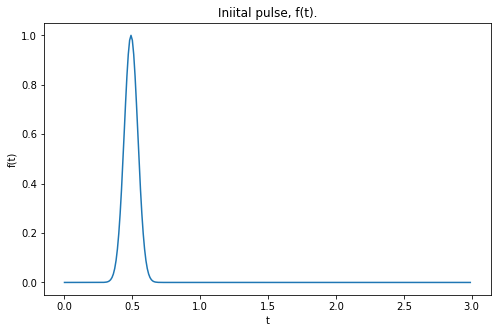

In [31]:
# Mixed condition coefficients
alpha = 0 #1.# 0.1 #-1. #0.01 #0.1 #0.1 #0 #1
beta  = 0#0.1# 0.1 #0.01 #0.1 #0.1 #0 #1
# Source 
src_width = 5 #4 # 30.0*np.sqrt(epsilon)
delay = 10*src_width
src_x = int(Nx/2.0)
def source(current_time, delay, src_width):
    return np.exp(-(current_time - delay)**2/(2.0*src_width**2))
# Initialize
# --- Compute time and space mesh ---
T = 3 #10 #3 #2 # or something that's long enough to see the PML working...
Nt = int(round(T/dt))
t = np.linspace(0, Nt*dt, Nt+1)      # Mesh points in time
CFL = 1
r = CFL*(dt/dx)
rhoA = 1
# --- Valid indices for space and time mesh ---
Ix = range(0, Nx)
It = range(0, Nt+1)
# order = 2
#I = np.arange(1,Nx-1) # vectorized x-indexing (2nd order scheme only)
#I = np.arange(0,Nx-2) # vectorized x-indexing (2nd order scheme only)
# variable material profile
slowness_factor = 1   # homogeneous=1, otherwise inhomogeneous
medium = [0.75, 0.85] # inhomogeneity (step)
c_0 = 1
def c(x):
    return c_0/slowness_factor \
            if medium[0] <= x <= medium[1] else c_0
# Call c(x) and fill array c
#x = np.linspace(0, L, Nx)          # Mesh points in space
c_ = np.zeros(x.shape)
for i in range(Nx):
    c_[i] = c(x[i])
c = c_  
#
rho_0 = 1
rho = rho_0
rhoA = rho                                    # Arithmetic average = constant, here
cH = np.zeros(x.shape)
cH[1:-1]  = 2* (c[1:-1] * c[2:])/(c[1:-1] + c[2:]) # Harmonic average
cH[0]    = c[0]
cH[Nx-1] = c[Nx-1]
# Plot the source
src = np.zeros(Nt)
for n in It[1:-1]:
    src[n-1] = source(n,delay,src_width)
plt.figure(figsize=(8,5)) #, dpi=200)
plt.plot(t[:-1],src)
plt.xlabel("t")
plt.ylabel("f(t)")
plt.title("Iniital pulse, f(t).")
plt.show()

creating and saving the animation...
...done!


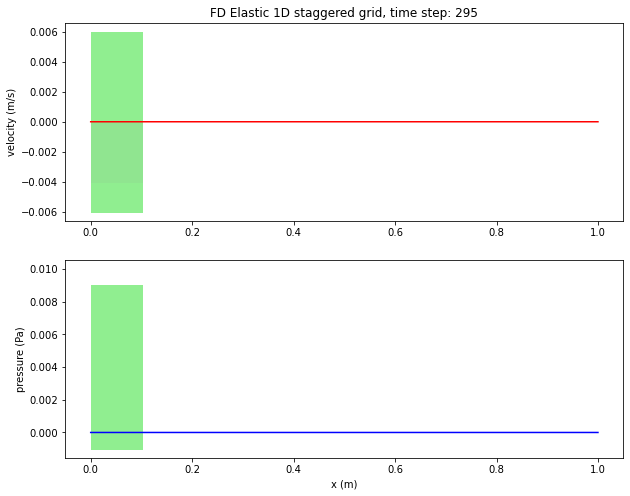

In [32]:
# --- Allocate memory for solutions ---
v     = np.zeros(Nx)   # Solution array at new time level
p     = np.zeros(Nx)   # Solution array at new time level
dv    = np.zeros(Nx)   # Solution difference at 1 time level back
dp    = np.zeros(Nx)   # Solution difference at 1 time level back
Psi_v = np.zeros(Nx)   # memory variable, Psi, for v
Psi_p = np.zeros(Nx)   # memory variable, Psi, for p
# Initialize the plot
title = "FD Elastic 1D staggered grid"
fig = plt.figure(figsize=(10,8))
vm = 0.004 # 0.4
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
ax1.add_patch(Rectangle((0,-vm),  l,vm,color='green', alpha=0.25))
#ax1.add_patch(Rectangle((L-l,-vm),l,vm,color='green', alpha=0.25))
#line1 = ax1.plot(x, v, color = "red", lw = 1.5)
#line2 = ax2.plot(x, p, color = "blue", lw = 1.5)
ax1.set_ylabel('velocity (m/s)')
ax2.set_xlabel('x (m)')
ax2.set_ylabel('stress (Pa)')
plts = []
# --- Time loop ---
isnap = 5 # plot every isnap snapshots
order = 2 # choose order of spatial scheme: 2 or 4
if order == 2:
    a = 0
    b = 1
    #I = np.arange(0,Nx-1) # vectorized x-indexing (2nd order scheme)
    I = np.arange(0,Nx-1) # vectorized x-indexing (2nd order scheme)
elif order == 4:
    a = -1./24.
    b = 9./8.
    I = np.arange(1,Nx-2) # vectorized x-indexing (4th order scheme)
# loop:
for n in It[1:-1]:
    # v-equation
    #dp[I]    = p[I+1] - p[I]
    #Psi_v[I] = bv_x[I]*Psi_v[I] + av_x[I]*dp[I] # update memory variable for v
    #v[I]     = v[I] + (r/rhoA)*dp[I] + r*Psi_v[I] # must check coeff of Psi !!!
    #print("n =",n)
    if order == 2:
        # 2nd order scheme
        #Psi_v[I] = bv_x[I]*Psi_v[I] + av_x[I]*(p[I] - p[I-1]) # PML update memory variable for v
        #v[I]     = v[I] + (r/rhoA)*(p[I] - p[I-1]) + r*Psi_v[I] # v update
        Psi_v[I] = bv_x[I]*Psi_v[I] + av_x[I]*(p[I+1] - p[I]) # update memory variable for v
        v[I]     = v[I] + (r/rhoA)*(p[I+1] - p[I]) + r*Psi_v[I] # must check coeff of Psi !!!
        # debug
        #with np.printoptions(precision=2, suppress=True):
        #    print('v = ',v)
        # Homogeneous, Dirichlet on v...
        # mixed BC at x=L
        #v[Nx-2] = (2*dx*beta + 4*v[Nx-3] - v[Nx-4])/(3 + 2*dx*alpha)
        #v[Nx-1] = (2*dx*beta + 4*v[Nx-2] - v[Nx-3])/(3 + 2*dx*alpha)
    elif order == 4:
        # 4th order scheme
        Psi_v[I] = bv_x[I]*Psi_v[I] + av_x[I]*(p[I+1] - p[I]) # PML update memory variable for v
        v[I]     = v[I] + (r/rhoA)*(a*(p[I+2] - p[I-1]) + b*(p[I+1] - p[I])) + r*Psi_v[I] # v update
        v[Nx-2]  = v[Nx-2] + (r/rhoA)*(p[Nx-1] - p[Nx-2]) + r*Psi_v[Nx-2] # 2nd order at RH edge
        # mixed BC at x=L
        #v[Nx-2] = (2*dx*beta + 4*v[Nx-3] - v[Nx-4])/(3 + 2*dx*alpha)
        v[Nx-1] = (2*dx*beta + 4*v[Nx-2] - v[Nx-3])/(3 + 2*dx*alpha)
    # p-equation
    #dv[I+1]    = v[I+1] - v[I]
    #Psi_p[I+1] = bp_x[I+1]*Psi_p[I+1] + ap_x[I+1]*dv[I+1] # update memory variable for p
    #p[I+1]     = p[I+1] + cH[I]*r*dv[I+1] + r*Psi_p[I+1] # must check coeff of Psi !!!
    if order == 2:
        # 2nd order scheme
        I1 = np.arange(0,Nx-2)
        #Psi_p[I1] = bp_x[I1]*Psi_p[I1] + ap_x[I1]*(v[I1] - v[I1-1]) # PML update memory variable for p
        #p[I1]     = p[I1] + cH[I1]*r*(v[I1+1] - v[I1]) + r*Psi_p[I1] # p update
        Psi_p[I1+1] = bp_x[I1+1]*Psi_p[I1+1] + ap_x[I1+1]*(v[I1+1] - v[I1]) # update memory variable for p
        p[I1+1]     = p[I1+1] + cH[I1]*r*(v[I1+1] - v[I1]) + r*Psi_p[I1+1] # must check coeff of Psi !!!
        # mixed BC at x=L
        p[Nx-1] = (2*dx*beta + 4*p[Nx-2] - p[Nx-3])/(3 + 2*dx*alpha)
    elif order == 4:
        # 4th order scheme
        Psi_p[I+1] = bp_x[I+1]*Psi_p[I+1] + ap_x[I+1]*(v[I+1] - v[I]) # PML update memory variable for p
        p[I+1]     = p[I+1] + cH[I]*r*(a*(v[I+2] - v[I-1]) + b*(v[I+1] - v[I])) + r*Psi_p[I+1] # p update
        p[Nx-2]    = p[Nx-2] + cH[Nx-3]*r*(v[Nx-2] - v[Nx-3]) + r*Psi_p[Nx-2] # 2nd order at RH edge
        # mixed BC at x=L
        p[Nx-1] = (2*dx*beta + 4*p[Nx-2] - p[Nx-3])/(3 + 2*dx*alpha)
    p[src_x]+= dt*source(n, delay, src_width) # dt*f(x[I], t[n]) 
    # debug
    #with np.printoptions(precision=2, suppress=True):
    #    print('p = ',p)
    # Updating the plots
    if not n % isnap: 
        ax1.set_title(title + ", time step: %i" % (n))  
        vm = 0.006 #0.5
        pm = 0.01 #1.0
        ax1.add_patch(Rectangle((0,-vm),  l,2*vm,color='lightgreen',alpha=0.1))
        #ax1.add_patch(Rectangle((L-l,-vm),l,2*vm,color='lightgreen',alpha=0.1))
        p1, = ax1.plot(x, v, color = "red", lw = 1.5)
        ax2.add_patch(Rectangle((0,-0.1*pm), l,pm,color='lightgreen',alpha=0.1))
        #ax2.add_patch(Rectangle((L-l,-0.1),l,0.6,color='lightgreen',alpha=0.1))
        #p2, = ax2.plot(x, p[:-1], color = "blue", lw = 1.5)
        p2, = ax2.plot(x, p, color = "blue", lw = 1.5)
        ax1.set_ylabel('velocity (m/s)')
        ax2.set_xlabel('x (m)')
        ax2.set_ylabel('pressure (Pa)')
        plts.append( [p1, p2] ) 
# save the animation?
anim = True #False #True
if anim:
    print('creating and saving the animation...')
    ani = animation.ArtistAnimation(fig, plts, interval=50, repeat_delay=3000)#, blit=True)
    Writer = animation.writers['ffmpeg']
    writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=3600)
    ani.save("cpml_mixed_1D.mp4", writer=writer)
    #ani.save("cpml_1D1.mkv", writer=writer)
    #ani.save("cpml_1D0.gif", writer=writer) 
    print('...done!')

PML errors at t=3.0: |e_v| = 4.83e-09, |e_p| = 3.03e-08


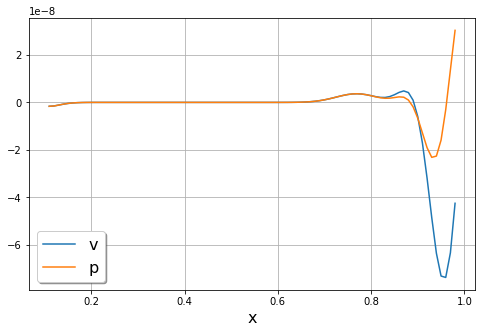

In [33]:
# check PML precision
Nx1 = int(pml_width)+1
Nx2 = Nx - 2 #int(pml_width)
err_pml_v = np.max(v[Nx1:Nx2]) 
err_pml_p = np.max(p[Nx1:Nx2]) 
print("PML errors at t=%.1f: |e_v| = %.3g, |e_p| = %.3g" % (T, err_pml_v, err_pml_p))
plt.figure(figsize=(8,5)) #, dpi=200)
Ix_int =  np.arange(Nx1,Nx2)
plt.plot(x[Ix_int],v[Ix_int],x[Ix_int],p[Ix_int])
#plt.plot(x,v[1:],x,p[:-1])
#plt.ylim(-0.5,0.5)
plt.legend(("v","p"), shadow=True, fontsize=16, loc = 'lower left')
plt.xlabel('x', fontsize=16)
plt.grid()

In [1]:
%%HTML
<video controls loop width="640" height="480">
  <source src="./examples/cpml_mixed_1D.mp4" type="video/mp4">
</video>